**W03 - Class Practice ( Decision Tree & Naïve Bayes Classification )**

Jessica Laurentia T - 0706022310008

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

Dataset ini memiliki 10.000 baris dan 16 kolom dengan kombinasi tipe data numerik dan kategorikal. Kolom numerik terdiri dari integer dan float seperti Age, Coffee_Intake, BMI, hingga Heart_Rate, sementara kolom kategorikal berupa object seperti Gender, Country, Sleep_Quality, Stress_Level, Health_Issues, dan Occupation. Dari informasi ini terlihat bahwa data cukup lengkap, hanya kolom Health_Issues yang memiliki nilai kosong sehingga perlu ditangani saat preprocessing.

In [380]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [381]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


Dari hasil `df.isnull().sum()` terlihat bahwa hampir semua kolom dalam dataset **tidak memiliki nilai kosong**, kecuali kolom **Health\_Issues** yang tercatat memiliki **5.941 nan** dari total 10.000 baris data. Namun **nan** ini bukan berarti missing values tetapi diganti dengan **none**

In [382]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'ID':
[    1     2     3 ...  9998  9999 10000]
--------------------
Unique values for column 'Age':
[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
--------------------
Unique values for column 'Gender':
['Male' 'Female' 'Other']
--------------------
Unique values for column 'Country':
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
--------------------
Unique values for column 'Coffee_Intake':
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.

In [383]:
df = df.drop(columns=['ID'])
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [384]:
df = df.fillna('none')
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,none,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,none,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


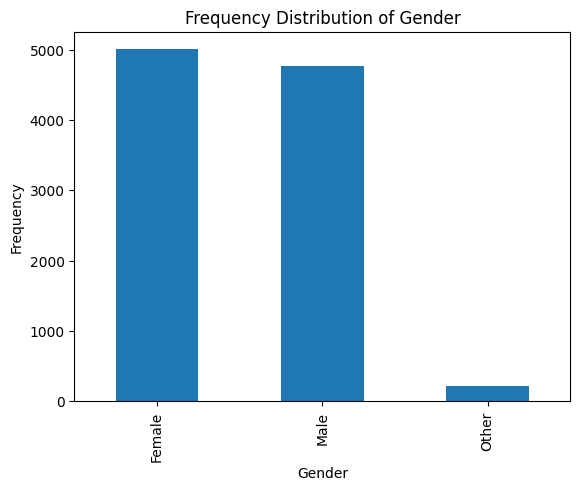

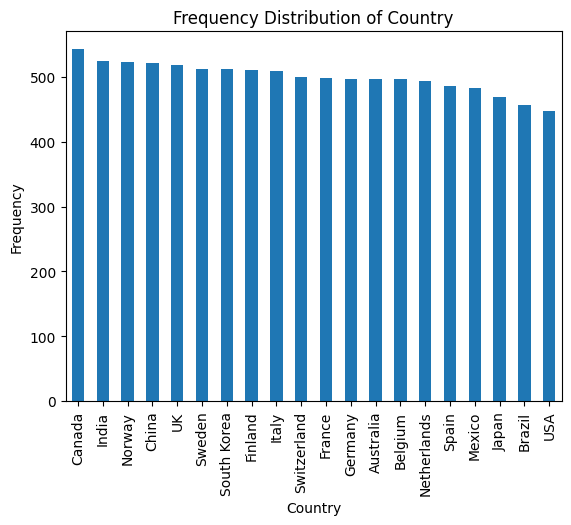

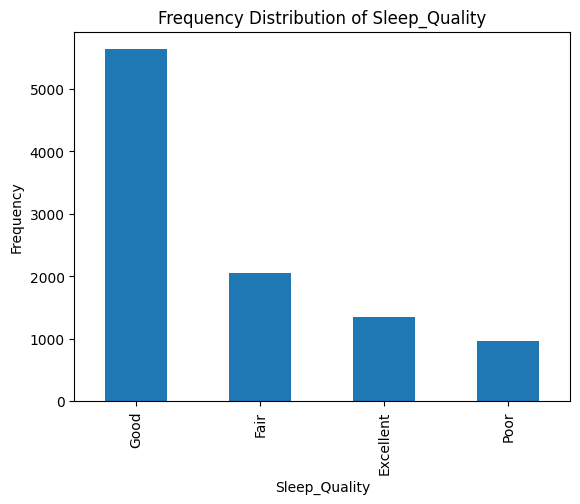

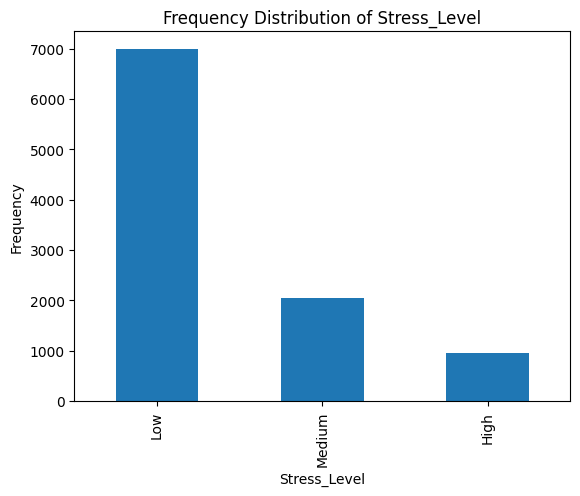

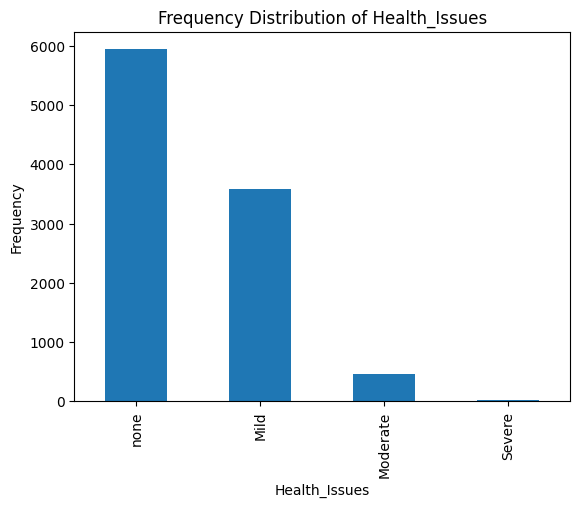

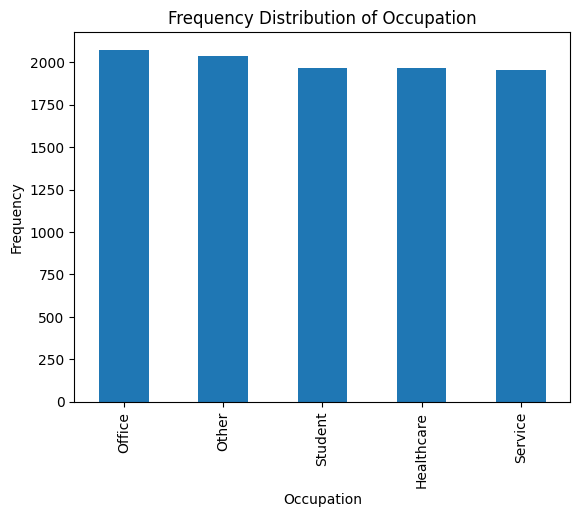

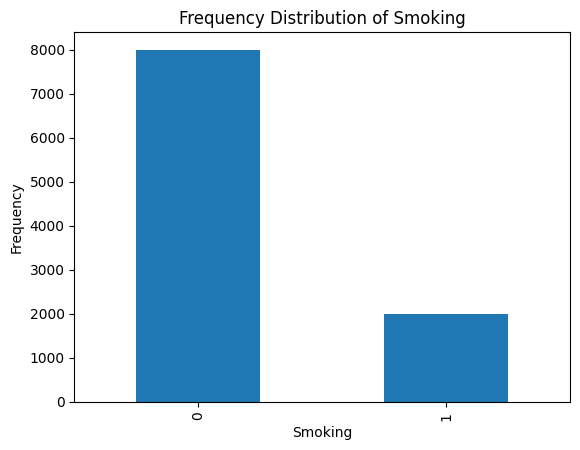

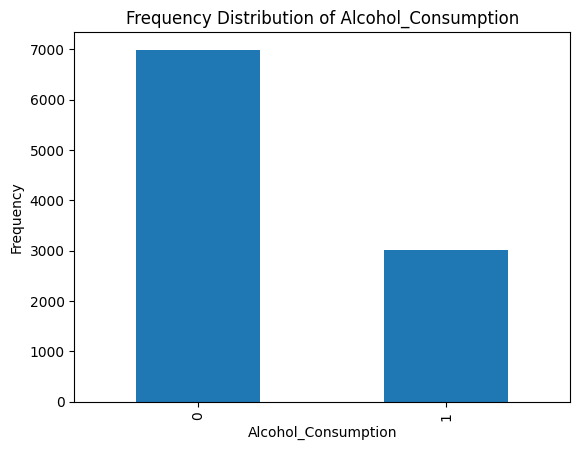

In [385]:
col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

## Summary of variables


- There are 14 variables in the dataset. 6 variables are of categorical data type, 2 variables are boolean, 8 variables are numerical

- The input variable are `Age`, `Gender`, `COuntry`, `Coffee_Intake`, `Caffeine_mg`, `Sleep_Hours`, `Sleep_Quality`, `BMI`, `Heart_Rate`, `Stress_Level`, `Physical_Activity_Hours`, `Occupation`, `Smoking`, `Alcohol_Comsumption`


- `Health_Issues` is the target variable.

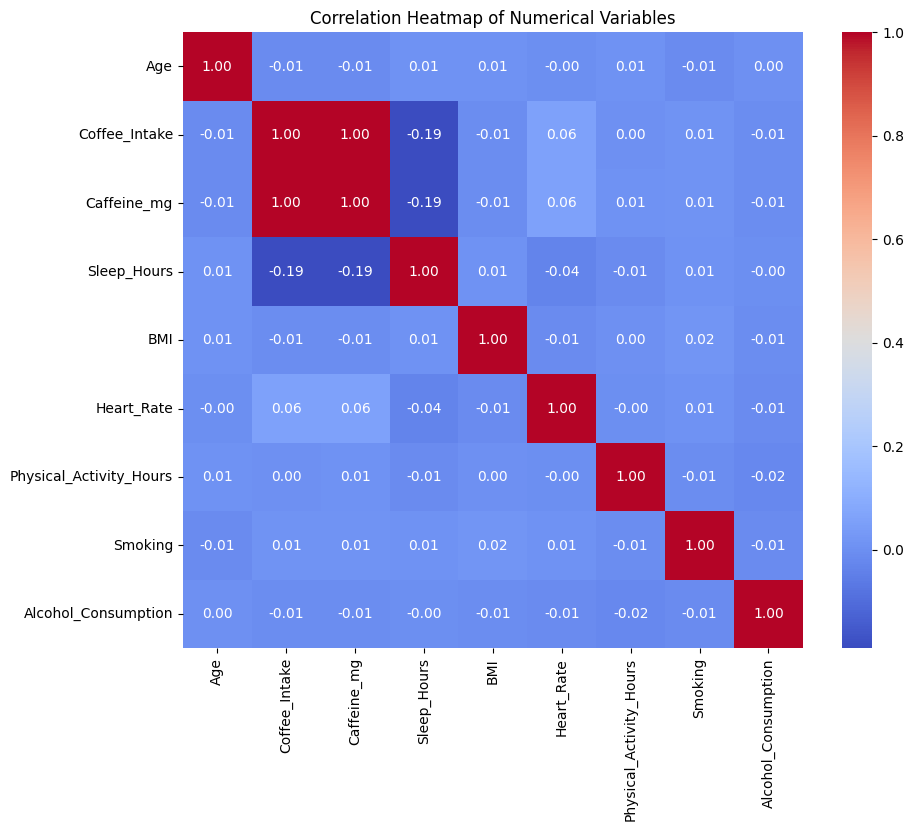

In [386]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Dari heatmap terlihat bahwa variabel terkait tidur memiliki hubungan yang kuat, di mana sleep_hours berkorelasi positif dengan sleep_quality dan negatif dengan tingkat stres. Selain itu, sleep_quality  dan stress_level juga berhubungan cukup erat dengan munculnya health_issues. Sementara itu, Age justru menunjukkan korelasi negatif dengan masalah kesehatan dalam dataset ini, artinya semakin muda cenderung lebih banyak tercatat memiliki masalah kesehatan. Ada juga korelasi sempurna antara jumlah kopi dan kadar kafein sehingga salah satunya bisa dianggap redundan. Variabel lain seperti BMI, detak jantung, kebiasaan merokok, dan konsumsi alkohol terlihat tidak memiliki korelasi yang kuat dengan variabel lainnya.

In [387]:
# Encoding for ordinal column

Gender = {'Male': 0, 'Female': 1, 'Other': 2}
Sleep_Quality = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
Country = {
    'Germany': 0, 'Brazil': 1, 'Spain': 2, 'Mexico': 3, 'France': 4, 'Canada': 5,
    'UK': 6, 'Switzerland': 7, 'Netherlands': 8, 'Italy': 9, 'China': 10, 'Japan': 11,
    'Belgium': 12, 'Finland': 13, 'Australia': 14, 'USA': 15, 'Sweden': 16, 'India': 17,
    'Norway': 18, 'South Korea': 19
}
Stress_Level = {'High': 0, 'Medium': 1, 'Low': 2}
Health_Issues = {'Severe': 0, 'Moderate': 1, 'Mild': 2, 'none':3}
Occupation = {'Healthcare': 0, 'Student': 1, 'Office': 2, 'Service': 3, 'Other': 4}
Binary = {'Yes': 1, 'No': 0}

df['Gender'] = df['Gender'].map(Gender)
df['Sleep_Quality'] = df['Sleep_Quality'].map(Sleep_Quality)
df['Country'] = df['Country'].map(Country)
df['Stress_Level'] = df['Stress_Level'].map(Stress_Level)
df['Health_Issues'] = df['Health_Issues'].map(Health_Issues)
df['Occupation'] = df['Occupation'].map(Occupation)

df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
873,26,1,13,5.2,498.3,5.9,1,26.0,68,1,13.5,2,3,1,0
1808,18,1,16,2.2,211.7,6.2,2,29.5,69,2,1.0,3,2,0,0
8213,23,1,1,2.8,265.5,6.0,2,27.1,79,2,11.7,3,4,1,0
5617,31,1,8,6.7,635.0,4.6,0,19.8,63,0,14.4,2,0,1,0
8191,30,1,12,4.9,462.7,3.6,0,23.8,70,0,2.0,2,2,0,1


In [388]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [389]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,0,0,3.5,328.1,7.5,2,24.9,78,2,14.5,4,0,0
1,33,0,0,1.0,94.1,6.2,2,20.0,67,2,11.0,3,0,0
2,42,0,1,5.3,503.7,5.9,1,22.7,59,1,11.2,2,0,0
3,53,0,0,2.6,249.2,7.3,2,24.7,71,2,6.6,4,0,0
4,32,1,2,3.1,298.0,5.3,1,24.1,76,1,8.5,1,0,1


In [390]:
y.head()

,Health_Issues
0,3
1,3
2,2
3,2
4,2


In [391]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [392]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [393]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,0,2,4.3,405.6,5.4,1,18.0,86,1,2.4,3,0,1
1561,26,0,17,0.0,0.0,5.5,1,28.3,75,1,10.8,4,0,0
1670,32,0,19,2.8,268.1,7.3,2,27.4,69,2,8.6,2,0,0
6087,18,0,19,2.2,208.6,8.1,3,16.3,83,2,8.9,4,0,1
6669,43,1,6,2.6,251.1,9.4,3,25.4,68,2,3.4,2,0,0


In [394]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,0,18,2.6,245.9,6.7,2,30.1,76,2,1.9,3,0,1
4684,22,1,3,3.1,293.1,7.6,2,20.4,69,2,5.0,3,0,0
1731,30,0,14,3.9,372.4,6.4,2,27.5,75,2,13.8,2,0,0
4742,35,0,0,1.0,92.5,5.3,1,23.1,71,1,2.4,3,0,0
4521,47,0,9,1.3,119.0,6.9,2,28.4,64,2,9.6,2,1,0


In [395]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [396]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=0)

In [397]:
y_pred_gini = clf_gini.predict(X_test)

In [398]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9980


[Text(0.5, 0.9285714285714286, 'x[6] <= 1.5\ngini = 0.519\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.5, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.125, 0.35714285714285715, 'x[8] <= 64.0\ngini = 0.49\nsamples = 14\nvalue = [0, 8, 6, 0]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.1875, 0.21428571428571427, 'x[2] <= 11.5\ngini = 0.397\nsamples = 11\nvalue = [0, 8, 3, 0]'),
 Text(0.125, 0.07142857142857142, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(0.25, 

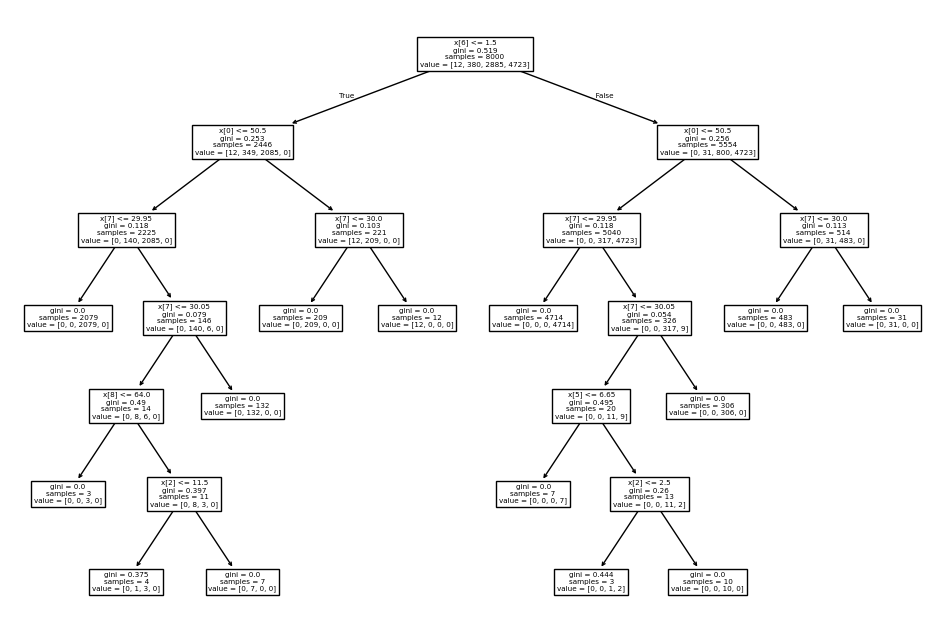

In [399]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [400]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [401]:
y_pred_en = clf_en.predict(X_test)

In [402]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9980


[Text(0.5, 0.9285714285714286, 'x[6] <= 1.5\nentropy = 1.202\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.5, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.5, 'x[7] <= 30.05\nentropy = 0.247\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.125, 0.35714285714285715, 'x[8] <= 64.0\nentropy = 0.985\nsamples = 14\nvalue = [0, 8, 6, 0]'),
 Text(0.0625, 0.21428571428571427, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.1875, 0.21428571428571427, 'x[2] <= 11.5\nentropy = 0.845\nsamples = 11\nvalue = [0, 8, 3, 0]'),
 Text(0.125, 0.07142857142857142, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'entropy = 0.0\nsamples = 7\nvalue

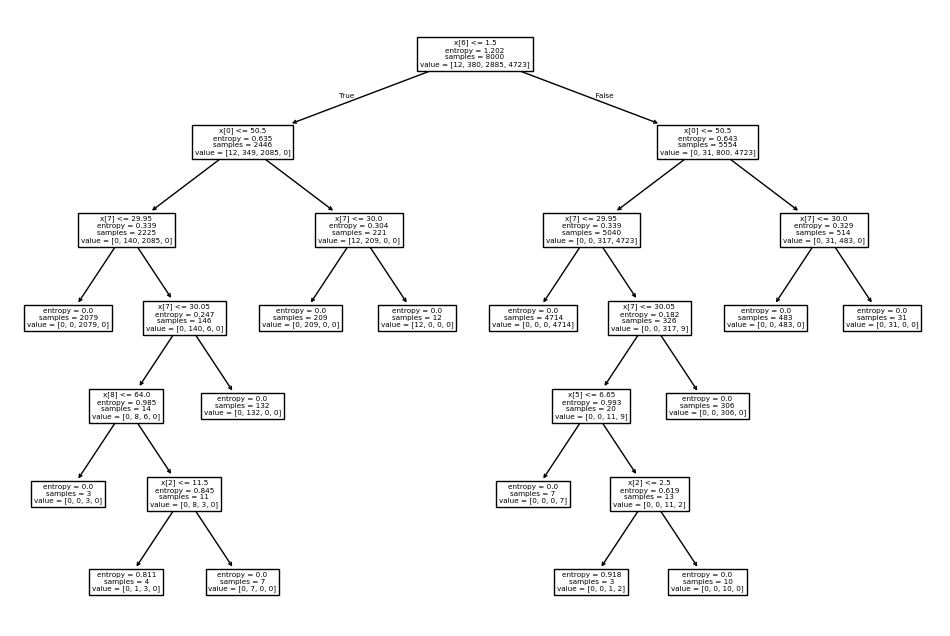

In [403]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [404]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [405]:
y_pred_nb = nb_classifier.predict(X_test)

In [406]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8570


In [407]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.99      0.99        83
           2       0.99      1.00      1.00       694
           3       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [408]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.99      0.99        83
           2       0.99      1.00      1.00       694
           3       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [409]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.71      0.14      0.24        83
           2       0.88      0.70      0.78       694
           3       0.85      1.00      0.92      1218

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



In [410]:
# Make a prediction with the gini index model

# Input values: buying high, maint low, doors 4, persons 2, lug_boot med, safety low
# These values need to be encoded according to the maps created earlier
new_data = {
    'Age': 28,
    'Gender': Gender['Male'],
    'Country': Country ['Brazil'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': Sleep_Quality['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': Stress_Level['High'],
    'Physical_Activity_Hours': 2,
    'Occupation': Occupation['Student'],
    'Smoking': Binary['Yes'],
    'Alcohol_Consumption': Binary['Yes']
}


# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([new_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# To get the inverse, we can use the class_map to get the original label
# This was already done in the previous step to print the predicted class.
# class_map = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
# class_map.items() → mengembalikan pasangan (key, value) misalnya ('unacc',0).
# {v:k for k,v in class_map.items()} → menukar posisi key & value.
# inv_class_map = {0: 'unacc', 1: 'acc', 2: 'good', 3: 'vgood'}

# reverse dictionary
inverse_prediction_gini = {v:k for k,v in Health_Issues.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction: 2
The predicted class for the given input using the gini index model is: Mild


**Explorary Data Analysis**

Dari hasil perbandingan bisa dilihat kalau Decision Tree dengan gini maupun entropy punya akurasi yang sama tinggi, yaitu 99,8%, sedangkan Naive Bayes akurasinya lebih rendah di 85,7%. Artinya, Decision Tree jauh lebih bagus dalam membaca pola data dibanding Naive Bayes, yang kelemahannya ada di asumsi antar fiturnya harus independen. Jadi, buat dataset ini model yang paling pas dipakai adalah **Decision Tree**.

In [411]:
from sklearn.metrics import accuracy_score
import pandas as pd

y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_en.predict(X_test)
y_pred_gnb = nb_classifier.predict(X_test)

acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

accuracy_table = pd.DataFrame({
    'Model': ['Decision Tree (gini)', 'Decision Tree (entropy)', 'Gaussian Naive Bayes'],
    'Accuracy': [acc_gini, acc_entropy, acc_gnb]
})

accuracy_table


,Model,Accuracy
0,Decision Tree (gini),0.998
1,Decision Tree (entropy),0.998
2,Gaussian Naive Bayes,0.857
